<a href="https://colab.research.google.com/github/pallavijog13/solution/blob/master/2021/Final/3%20Business/CodeGladiator2021_Business.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inputs

### Get number of Manufacturing Orders(MO) and total number of machines need to acquire

In [1]:
MO, MM = str.split(input ('Enter number of MO and total machines required:'))

MO = int(MO)
MM = int(MM)

MO, MM

Enter number of MO and total machines required:2 4


(2, 4)

### Get price quoted for Manufacturing Order (MO_Prices) and number of machines required for that Manufacturing Order (MO_machines)

In [55]:
MO_prices = {}
MO_machines = {}

for i in range(1, MO+1):
    price, machines = str.split(input (f'Enter price for MO{i} and machines required for MO{i}:'))
    price = int(price)
    machines = int(machines)

    MO_prices[i] = price
    MO_machines[i] = machines

MO_prices, MO_machines

Enter price for MO1 and machines required for MO1:2000 2
Enter price for MO2 and machines required for MO2:2000 3


({1: 2000, 2: 2000}, {1: 2, 2: 3})

### Get data (machine number and its rent) per MO and build 2D table: 
rows --> # of MOs

columns --> # of machines

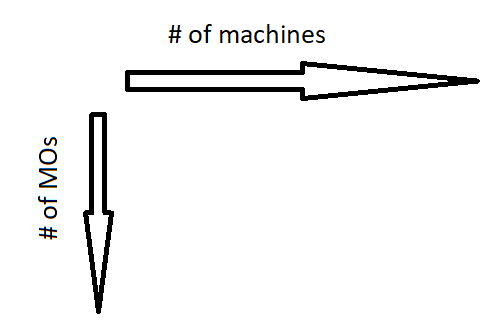


In [79]:
M_table = [ [0]*MM for i in range(MO)]
for mo_number,machines in MO_machines.items():
    print ('MO', mo_number)
    for m in range(machines):
        number, rent = str.split(input ('Enter machine number and rent:'))
        M_table[mo_number-1][int(number)-1] = int(rent)

M_table

MO 1
Enter machine number and rent:1 100
Enter machine number and rent:3 400
MO 2
Enter machine number and rent:1 400
Enter machine number and rent:2 600
Enter machine number and rent:4 1500


[[100, 0, 400, 0], [400, 600, 0, 1500]]

### Get the cost price (M_CP) per machine.

In [72]:
M_CP = []
for k in range(MM):
    cp = input (f'Enter machine CP for machine{k+1}:')
    M_CP.append(int(cp))

M_CP

Enter machine CP for machine0:500
Enter machine CP for machine1:800
Enter machine CP for machine2:1100
Enter machine CP for machine3:1500


[500, 800, 1100, 1500]

### Profit array (profits) to be filled in with profits using all combinations

In [89]:
#@title No need of this list to calculate best profits. BestPriceCalculation() always makes sure that its profitable
profits = []

In [88]:
#@title This calculation is not required.
# Include all MOs to calculate profits

total_profit = 0

for i in range(MO):
    mo_profit = MO_prices[i+1] - sum(M_table[i-1])
    if mo_profit > 0: # Do not include the amount which is less than zero (non-profit)
        total_profit += mo_profit

profits.append(total_profit)

total_profit

1500

In [82]:
# build best_price dictionary based on its price in CP vs total rent to be paid for every MO
def BestPriceCalculation():
    best_combination = {}
    updated_M_table = M_table[:]

    for i in range(MM):
        total = 0
        for j in range(MO):
            total += M_table[j][i]
        
        if total > M_CP[i]:
            best_combination[i+1] = M_CP[i]
    return best_combination

best_price = BestPriceCalculation()
best_price

{}

### Calculate profit based on best_price considering combination from CP and individual rent amounts

In [90]:
total_profit = 0


for i in range(MO): # for every MO
    total_cost = 0
    for j in range(MM): # for every machine in specific MO
        print (M_table[i][j], (j+1), (j+1) in best_price.keys())
        if (M_table[i][j] != 0) and ((j+1) in best_price.keys()):
            continue
        else:
            total_cost += M_table[i][j]
            print ('total_cost:', total_cost)

    if (MO_prices[i+1] - total_cost) > 0: # do not consider this MO if its in loss, in spite of taking best combinations.
        total_profit += MO_prices[i+1] - total_cost

    print ('total_profit:', total_profit)
    # print (mo_profit)
if best_price:
    for k in best_price.keys(): # browse through machine ids in best_price dictionary
        total_profit = total_profit - best_price[k]

#profits.append(total_profit)

total_profit

100 1 False
total_cost: 100
0 2 False
total_cost: 100
400 3 False
total_cost: 500
0 4 False
total_cost: 500
total_profit: 1500
400 1 False
total_cost: 400
600 2 False
total_cost: 1000
0 3 False
total_cost: 1000
1500 4 False
total_cost: 2500
total_profit: 1500


1500

In [91]:
print ('Maximum profit that can be achieved:', total_profit)

Maximum profit that can be achieved: 1500
